In [3]:
import numpy as np
import pandas as pd
import glob
from nltk.tokenize import sent_tokenize, word_tokenize

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
path = '/Users/shikha/Documents/projects/kaggle/google_qa/'
train_file = path + "google_qa_train.csv"

df = pd.read_csv(train_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6079 entries, 0 to 6078
Data columns (total 41 columns):
qa_id                                    6079 non-null int64
question_title                           6079 non-null object
question_body                            6079 non-null object
question_user_name                       6079 non-null object
question_user_page                       6079 non-null object
answer                                   6079 non-null object
answer_user_name                         6079 non-null object
answer_user_page                         6079 non-null object
url                                      6079 non-null object
category                                 6079 non-null object
host                                     6079 non-null object
question_asker_intent_understanding      6079 non-null float64
question_body_critical                   6079 non-null float64
question_conversational                  6079 non-null float64
question_expect_short_a

In [7]:
df.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a13675610>,
      dtype=object)

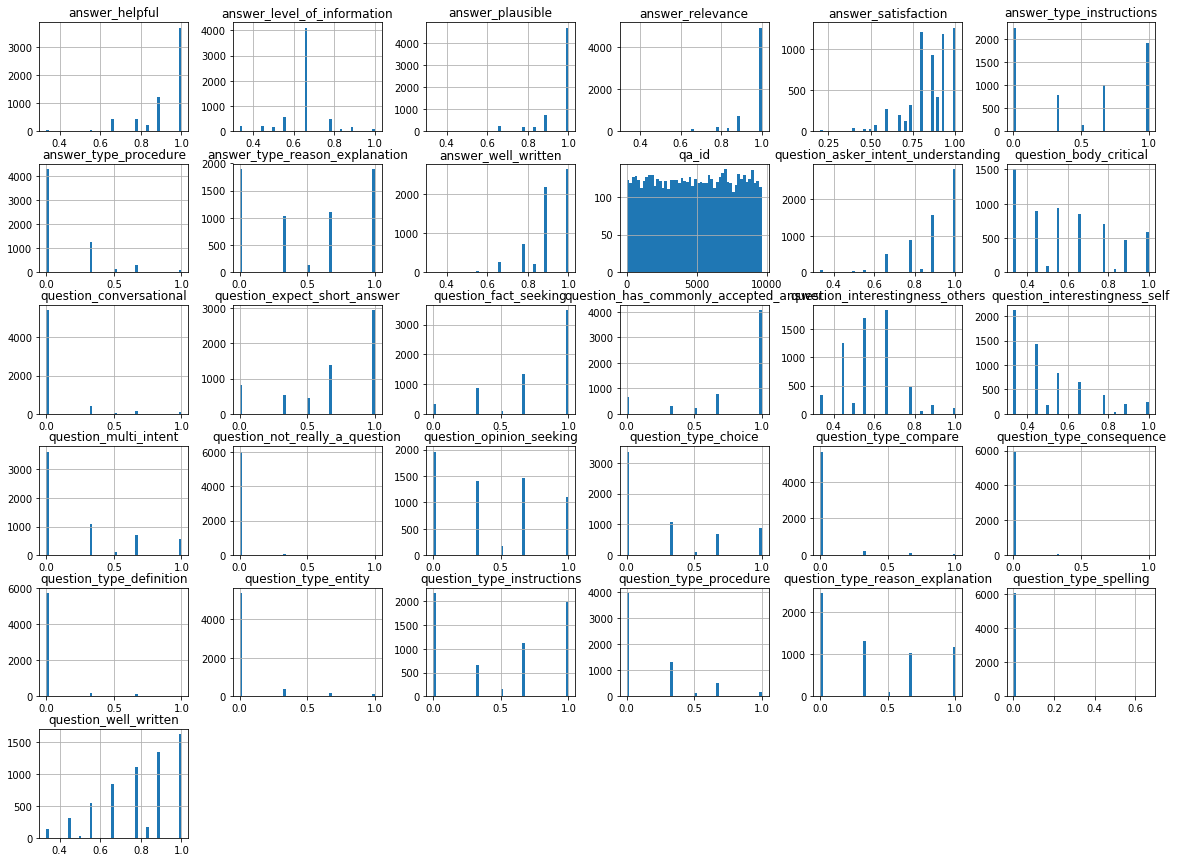

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [10]:
feat_cols = [
    'question_title', 
    'question_body', 
    'question_user_name', 
    'question_user_page', 
    'answer', 
    'answer_user_name', 
    'answer_user_page', 
    'url', 
    'category', 
    'host']
target_cols = [
    'question_asker_intent_understanding', 
    'question_body_critical', 
    'question_conversational', 
    'question_expect_short_answer', 
    'question_fact_seeking', 
    'question_has_commonly_accepted_answer',
    'question_interestingness_others', 
    'question_interestingness_self', 
    'question_multi_intent', 
    'question_not_really_a_question', 
    'question_opinion_seeking', 
    'question_type_choice',
    'question_type_compare', 
    'question_type_consequence', 
    'question_type_definition', 
    'question_type_entity', 
    'question_type_instructions', 
    'question_type_procedure', 
    'question_type_reason_explanation', 
    'question_type_spelling',
    'question_well_written', 
    'answer_helpful', 
    'answer_level_of_information', 
    'answer_plausible', 
    'answer_relevance', 
    'answer_satisfaction', 
    'answer_type_instructions', 
    'answer_type_procedure', 
    'answer_type_reason_explanation',
    'answer_well_written'
]
print('we have %d feature columns and %d target columns' % (len(feat_cols) , len(target_cols)))

we have 10 feature columns and 30 target columns


In [ ]:
peek = df.sample()
text_cols = [
    'question_title',
    'question_body',
    'answer'
]

for col_name in feat_cols + target_cols:
    print(col_name)
    print('='* 10)
    print(str(peek[col_name].values[0]) + '\n')

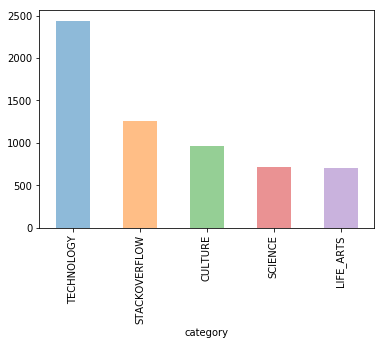

In [17]:
df.groupby('category').count()['qa_id'].sort_values(ascending=False).plot(kind='bar', alpha=0.5)

Distribution of text length:

In [19]:
df['question_title_len'] = df['question_title'].map(lambda x: len(word_tokenize(x.decode('utf-8'))))
df['question_body_len'] = df['question_body'].map(lambda x: len(word_tokenize(x.decode('utf-8'))))
df['answer_len'] = df['answer'].map(lambda x: len(word_tokenize(x.decode('utf-8'))))

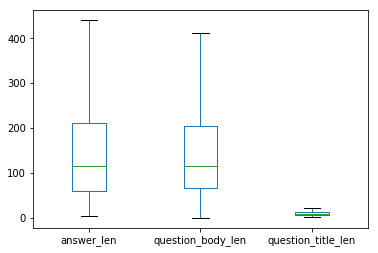

In [20]:
df[['answer_len', 'question_body_len', 'question_title_len']].plot(kind='box', showfliers=False)

Generate word cloud:

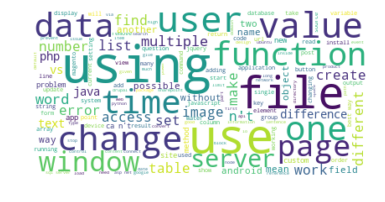

In [81]:
# !pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

def generate_word_cloud(col):
    rows = df[col].map(lambda x: word_tokenize(x.decode('utf-8'))).values.tolist()
    all_words = []
    for row in rows:
        for word in row:
            if word not in STOPWORDS:
                all_words.append(word.lower())
    wordcloud = WordCloud(max_font_size=60, max_words=150, background_color ='white').generate(' '.join(all_words)) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
  

generate_word_cloud('question_title')

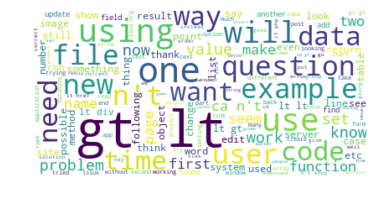

In [71]:
generate_word_cloud('question_body')

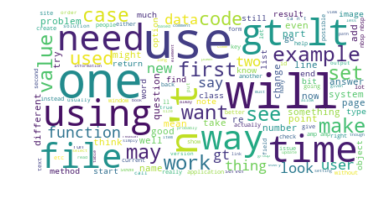

In [73]:
generate_word_cloud('answer')

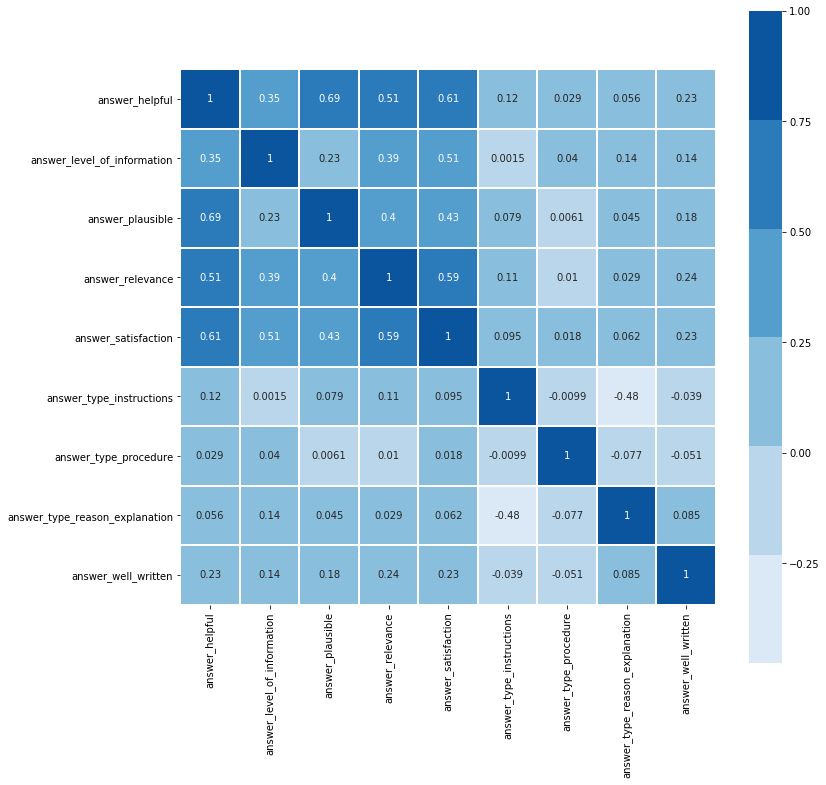

In [77]:
import seaborn as sns
import re

question_related_target_cols = [ col for col in target_cols if re.search('^question_', col)]
answer_related_target_cols = [ col for col in target_cols if re.search('^answer_', col)]

plt.figure(figsize=(12, 12))
sns.heatmap(data=df[answer_related_target_cols].corr(), 
            square=True, 
            annot=True,
            linewidths=1, 
            cmap=sns.color_palette("Blues"))

In [87]:
X_train = df.filter(feat_cols, axis=1)
Y_train = df[target_cols]

In [88]:
X_train.shape

(6079, 10)